In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

In [3]:
df=pd.read_csv('wine_quality.csv')

In [12]:
df.head()

,quality_score,wine_type,alcohol,citric_acid,density,ph,residual_sugar,total_sulfur_dioxide,fixed_acidity
0,7.06,1,12.9,0.26,0.99080,3.08,9.7,102.0,6.2
1,4.27,1,9.5,0.09,0.99566,2.93,10.9,131.0,6.6
2,6.35,1,9.6,0.23,0.99450,3.34,6.2,117.0,6.7
3,7.08,1,13.4,0.24,0.98934,3.04,6.1,86.0,6.2
4,5.75,1,9.5,0.24,0.99420,2.99,3.6,85.0,6.9


In [11]:
le=LabelEncoder()
df['wine_type']=le.fit_transform(df['wine_type'])

In [13]:
X=df.drop('quality_score',axis=1)
y=df['quality_score']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
pca=PCA()
X_pca=pca.fit_transform(X_train)

explained_variance=pca.explained_variance_

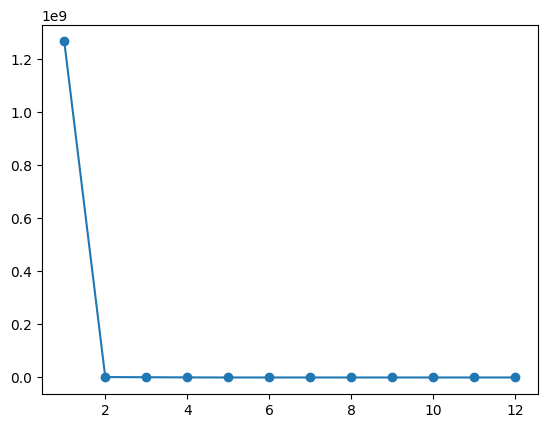

In [62]:
plt.plot(range(1,len(explained_variance)+1),explained_variance,marker='o')

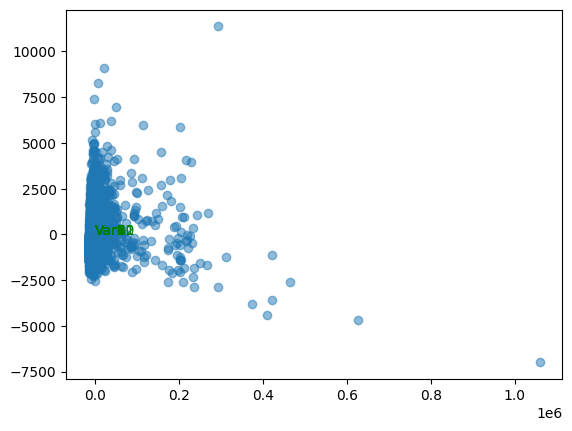

In [63]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
components = pca.components_.T

# Biplot
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
for i, v in enumerate(components):
    plt.arrow(0, 0, v[0], v[1], color='r', head_width=0.05)
    plt.text(v[0]*1.1, v[1]*1.1, f"Var{i+1}", color='g')

In [16]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [17]:
y_pred=model.predict(X_test)

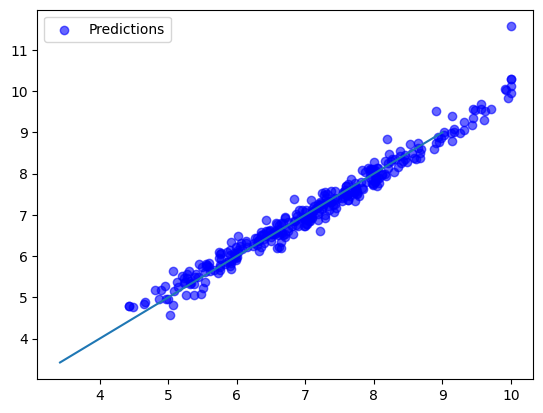

In [19]:
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predictions')
plt.plot([y_test.min()-1, y_test.max()-1], [y_test.min()-1, y_test.max()-1])
plt.legend()

In [20]:
print("r2 score:",r2_score(y_test,y_pred))
print("mean squared error:",mean_squared_error(y_test,y_pred))

r2 score: 0.9703944627829557
mean squared error: 0.04534165173128764
